In [1]:
import pandas as pd
import shutil
from os import listdir, mkdir, path
from pathlib import Path
import sys
from email.parser import HeaderParser
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from collections import Counter

# Extract headers and bodies from Ham Emails

In [3]:
parser = HeaderParser()
columns = ['received1',
'received2',
'received3',
'received4',
'received5',
'received6',
'received7',
'received8',
'received9',
'received10',
'received11',
'received12',
'received13',
'received14',
'received15',
'received16',
'hops',
'subject',
'date',
'message-id',
'from',
'return-path',
'to',
'content-type',
'mime-version',
'x-mailer',
'content-transfer-encoding',
'x-mimeole',
'x-priority',
'list-id',
'lines',
'x-virus-scanned',
'status',
'content-length',
'precedence',
'delivered-to',
'list-unsubscribe',
'list-subscribe',
'list-post',
'list-help',
'x-msmail-priority',
'x-spam-status',
'sender',
'errors-to',
'x-beenthere',
'list-archive',
'reply-to',
'x-mailman-version',
'x-miltered',
'x-uuid',
'x-virus-status',
'x-spam-level',
'x-spam-checker-version',
'references',
'in-reply-to',
'user-agent',
'thread-index',
'cc',
'received-spf',
'x-original-to',
'content-disposition',
'mailing-list',
'x-spam-check-by',
'domainkey-signature',
'importance',
'x-mailing-list',
'label']

# List to store row dictionaries for headers
list_of_rows = []
# List to store email bodies
list_of_bodies = []

def addEmailsToDict(email_list):
    global parser, list_of_rows, list_of_bodies
    
    # The label for ham, set to '0'
    label = 0
    

    # Read the full email content
    for email in email_list:
        row_dict = {}
        
        # Parse the email content
        h = parser.parsestr(email)

        # Parse recieved field
        received_list = h.get_all('received')
        hops = 0
        if received_list is not None:
            hops = len(received_list)
            col_name_recieved = 'received'

            for inx, received_field in enumerate(received_list):
                col = col_name_recieved + str(inx+1)
                row_dict[col] = received_field


        # Make everything lowercase to avoid issues
        features_lower_case = [x.lower() for x in h.keys()]

        # Parse everything else
        new_row = dict(zip(features_lower_case, h.values()))
        new_row['hops'] = hops

        # Extract and store the email body
        body = h.get_payload()
        list_of_bodies.append({'email_body': body, 'label': label})


        for key,value in new_row.items():
            if key in columns:
                row_dict['label'] = label
                row_dict[key] = value


        list_of_rows.append(row_dict)

def process_file(file_path):
    global list_of_rows, list_of_bodies
    
    emailStr = ''
    try:
        with open(file_path, encoding='latin_1') as emailFile:
            for line in emailFile:
                emailStr += line
    except UnicodeDecodeError:
        print(f'Unicode Error in file {file_path}!')
    
    email_list = emailStr.split('\nFrom jose@monkey.org')
    addEmailsToDict(email_list)

def main():
    global list_of_rows, list_of_bodies 

    directory_path = '../Data/HamEmails/data/'  # Directory containing the .eml files
    source_folders = [directory_path + folder for folder in listdir(directory_path) if path.isdir(path.join(directory_path, folder))]

    limit = 100000 # Limit the number of emails to process
    counter = 0
    # Process all the .eml files in the directory
    for website_folder in source_folders:
        for email_folder in listdir(website_folder):
            if path.isdir(path.join(website_folder, email_folder)):
                for filename in listdir(path.join(website_folder, email_folder)):
                    if filename.endswith('.eml') and counter < limit:
                        file_path = path.join(website_folder, email_folder, filename)
                        process_file(file_path)
                        counter += 1

    # Headers DataFrame
    df_headers = pd.DataFrame(list_of_rows)
    final_columns = [col for col in columns if col in df_headers.columns]
    df_headers = df_headers[final_columns]
    df_headers.to_csv("../Data/HamEmails/extracted/extracted_{}_headers.csv".format(limit), index=False)

    # Bodies DataFrame
    df_bodies = pd.DataFrame(list_of_bodies)
    df_bodies.to_csv("../Data/HamEmails/extracted/extracted_{}_bodies.csv".format(limit), index=False)

if __name__ == '__main__':
    main()

('return-path', 500)
('x-original-to', 500)
('delivered-to', 500)
('received', 500)
('authentication-results', 500)
('received-spf', 500)
('mime-version', 500)
('date', 500)
('message-id', 500)
('from', 500)
('to', 500)
('subject', 500)
('content-type', 500)
('dkim-signature', 498)
('list-unsubscribe', 494)
('x-csa-complaints', 479)
('list-id', 439)
('x-nc-cid', 439)
('list-unsubscribe-post', 402)
('x-report-abuse', 397)
('x-mailer', 380)
('x-emarsys-identify', 356)
('x-emarsys-environment', 356)
('x-rspamd-queue-id', 250)
('x-spamd-result', 250)
('x-rspamd-server', 250)
('reply-to', 138)
('x-job', 97)
('x-mid', 57)
('feedback-id', 41)
('x-rpcampaign', 38)
('x-orgid', 38)
('content-transfer-encoding', 29)
('x-sfmc-stack', 29)
('x-complaints-to', 26)
('x-messageid', 22)
('x-abuse-info', 22)
('sender', 22)
('x-sender', 20)
('x-250ok-cid', 19)
('x-subscription', 18)
('x-rspamd-pre-result', 5)
('content-disposition', 4)
('x-abuse-id', 2)
('x-sendjob-id', 2)
('x-fi-abs-verify', 2)
('form-su

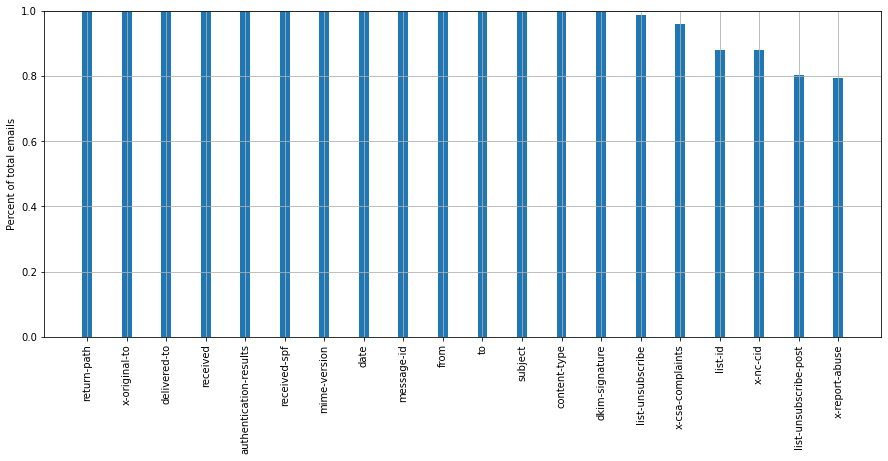

In [3]:
parser = HeaderParser()
dict_header_features = {}
total_emails = 0


def addEmailsToDict(email):
    global parser, dict_header_features, total_emails
        
    total_emails += 1
    h = parser.parsestr(email)
    features_lower_case = [x.lower() for x in h.keys()]
    features_dict = Counter(features_lower_case)

    for k,v in features_dict.items():
        if k in dict_header_features:
            dict_header_features[k] += 1
        else:
            dict_header_features[k] = 1

def main():
    global dict_header_features, total_emails
    
    directory_path = '../Data/HamEmails/data/'  # Directory containing the .eml files
    source_folders = [directory_path + folder for folder in listdir(directory_path) if path.isdir(path.join(directory_path, folder))]

    limit = 2544 # Limit the number of emails to process
    counter = 0
    # Process all the .eml files in the directory
    for website_folder in source_folders:
        for email_folder in listdir(website_folder):
            if path.isdir(path.join(website_folder, email_folder)):
                for filename in listdir(path.join(website_folder, email_folder)):
                    if filename.endswith('.eml') and counter < limit:
                        file_path = path.join(website_folder, email_folder, filename)
                        emailStr = ''
                        try:
                            with open(file_path, encoding='latin_1') as emailFile:
                                for line in emailFile:
                                    emailStr += line
                        except UnicodeDecodeError:
                            print('Unicode Error!')

                        #print(email_list[1])

                        addEmailsToDict(emailStr)
                        counter += 1
        
    dict_header_features = sorted(dict_header_features.items(), key=lambda x:x[1], reverse=True)

    for v in dict_header_features:
        print(v)
        
    unzipped = list(zip(*dict_header_features))
    lab = unzipped[0]
    val = unzipped[1]
    print("TOTAL EMAIL COUNT:", total_emails)
    val = [x/total_emails for x in val]
    figure(figsize=(15, 6))
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.xticks(rotation='vertical')
    plt.ylabel('Percent of total emails')
    plt.bar(lab[0:20], val[0:20], width=0.25)
    plt.grid()
    plt.savefig('most_common_header_features_ham.png', bbox_inches="tight")
    plt.show()

if __name__ == '__main__':
    main()